### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 287 monitoring'

In [4]:
mixture_path = '../../data/PMG_287/PMG_287.csv'

reagents_path = '../../data/PMG_287/PMG_287_widmo0.csv'

mixture_separator = '\t'

reagents_separator = '\t'

data_path = '../../data/PMG_287/'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [6]:
mixture_time_data

,Unnamed: 0,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_1,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_2,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_3,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_4,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_5,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_6,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_7,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_8,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_9,...,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_991,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_992,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_993,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_994,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_995,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_996,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_997,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_998,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_999,PMG_287_seria1\nSTANDARD_PROTON_PARAMETERS\n_1000
0,-0.025328,-0.005689,-0.006786,-0.011056,-0.013892,-0.015281,-0.016141,-0.014938,-0.018105,-0.015954,...,-0.014923,-0.018339,-0.021246,-0.018259,-0.021319,-0.020553,-0.021422,-0.019402,-0.021170,-0.015401
1,-0.025206,-0.005481,-0.006778,-0.010921,-0.013797,-0.015251,-0.016038,-0.015102,-0.018126,-0.015947,...,-0.014904,-0.018599,-0.021382,-0.018119,-0.021451,-0.020760,-0.021238,-0.019406,-0.021039,-0.015440
2,-0.025084,-0.005342,-0.006588,-0.010693,-0.013690,-0.015279,-0.015906,-0.015345,-0.017969,-0.015937,...,-0.015019,-0.018528,-0.021292,-0.018063,-0.021538,-0.020836,-0.021247,-0.019343,-0.021014,-0.015371
3,-0.024963,-0.005537,-0.006455,-0.010633,-0.013698,-0.015216,-0.016028,-0.015342,-0.017812,-0.015935,...,-0.015123,-0.018301,-0.020991,-0.018339,-0.021541,-0.020598,-0.021383,-0.019374,-0.021115,-0.015262
4,-0.024841,-0.005771,-0.006565,-0.010837,-0.013835,-0.015066,-0.016293,-0.015166,-0.017871,-0.015884,...,-0.015056,-0.018278,-0.020895,-0.018641,-0.021564,-0.020421,-0.021384,-0.019395,-0.021211,-0.015230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61991,7.515230,-0.004508,-0.005798,-0.005364,-0.004695,-0.004243,-0.003941,-0.004018,-0.005818,-0.004056,...,-0.005176,-0.004135,-0.006288,-0.004664,-0.006172,-0.005686,-0.005903,-0.004214,-0.004680,-0.005175
61992,7.515350,-0.004673,-0.005704,-0.005664,-0.004859,-0.004215,-0.003838,-0.004087,-0.005707,-0.003886,...,-0.005403,-0.004094,-0.006321,-0.004885,-0.006101,-0.005653,-0.005723,-0.004113,-0.004688,-0.005173
61993,7.515480,-0.004731,-0.005541,-0.005884,-0.004772,-0.004117,-0.003722,-0.004057,-0.005666,-0.003876,...,-0.005579,-0.003826,-0.006477,-0.004828,-0.005966,-0.005628,-0.005768,-0.003863,-0.004842,-0.005110
61994,7.515600,-0.004483,-0.005455,-0.005727,-0.004698,-0.004054,-0.003700,-0.003906,-0.005779,-0.003976,...,-0.005507,-0.003698,-0.006581,-0.004785,-0.005947,-0.005560,-0.005890,-0.003744,-0.004946,-0.005017


In [7]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [8]:
mixture_time_data.columns = names

In [9]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


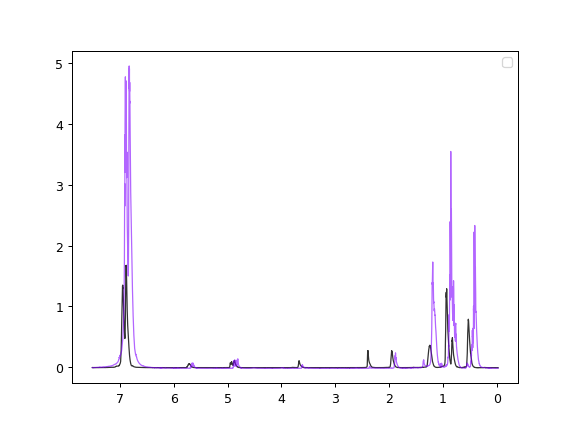

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [18]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [12]:
reagent = pd.read_csv(reagents_path, sep=reagents_separator, header=None).iloc[:,:2]

In [13]:
reagent

,0,1
0,-1.97168,-0.018529
1,-1.97156,-0.018688
2,-1.97144,-0.018458
3,-1.97132,-0.018228
4,-1.97120,-0.018311
...,...,...
131067,13.97130,-0.018393
131068,13.97140,-0.018458
131069,13.97150,-0.018523
131070,13.97160,-0.018365


In [14]:
ppm = reagent.iloc[:,0]
ints = reagent.iloc[:,1]
reagent_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([reagent_sp], profile=True)
#NMRSpectrum.plot_all([reagent_sp, load_spectrum(mixture_time_data, 1)], profile=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [15]:
substrat0 = reagent[reagent[0].apply(lambda x: (x>5.6 and x<6) or (x>4.7 and x<5.2) or (x>1.9 and x<2.2) or (x>1.2 and x<1.5) or (x>0.8 and x<0.97))]
substrat1 = reagent[reagent[0].apply(lambda x: (x>3.6 and x<4) or (x>0.97 and x<1.15) or (x>0.5 and x<0.75))]

In [16]:
ppm = substrat0.iloc[:,0]
ints = substrat0.iloc[:,1]
sp0_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
ppm = substrat1.iloc[:,0]
ints = substrat1.iloc[:,1]
sp1_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
#mix1 = load_spectrum(mixture_time_data, 1)
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp0_sp, sp1_sp], profile=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


#### Mixture

In [21]:
mixture_time_data = mixture_time_data[mixture_time_data.iloc[:,0].apply(lambda x: x<6.5)]

<IPython.core.display.Javascript object>


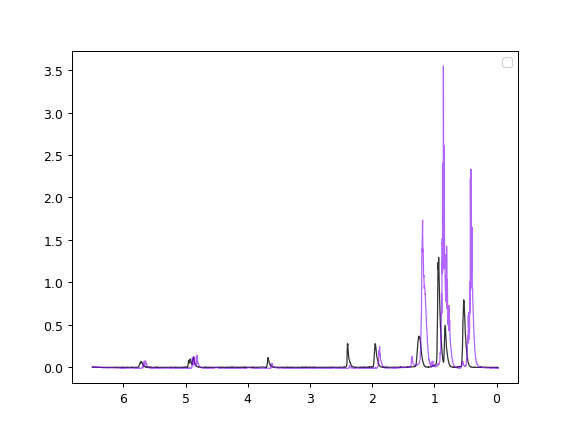

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [24]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

### Saving preprocessed spectra

In [25]:
np.savetxt(data_path + 'preprocessed_substrate0.csv', substrat0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_substrate1.csv', substrat1, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_mixture.csv', mixture_time_data, delimiter = '\t')